# KM Hypercall Visualization

KM `-Vhypercall` dumps information about each hypercall executed by a system. This is a set of tools to analyze the dump.

Since every message is timestamped, the messages can be treated as a time series of events.

In [540]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

def read_kmtrace(file):
    i = []
    x = []
    with open(file) as f:
        for line in f:
            f = line.split()
            if len(f) == 10 and f[1] == 'hypercall':
                match = re.search(r'\d\d:\d\d:\d\d\.\d\d\d\d\d\d', f[0])
                if match is None:
                    print("Error: bogus time stamp", f[0])
        
                i.append(f[0][match.start() : match.end()])
                x.append([f[3], f[8][1:-1]])
                
    df = pd.DataFrame(x, columns=['CPU', 'hypercall'], index=pd.to_datetime(i))
    return df

def sorted_cpus(df):
    return sorted(list(df['CPU'].unique()), key=lambda cpu: int(cpu[5:]))

def sorted_hypercalls(df):
    return sorted(list(df['hypercall'].unique()))

def cpu_strip_chart(df):
    cpus = sorted_cpus(df)
    fig, ax = plt.subplots(len(cpus), figsize=[9.6, 38.4], sharex=True)
    fig.subplots_adjust(hspace=0)
    for i in range(len(cpus)):
        c = pd.DataFrame(df['CPU'] == cpus[i])
        c['CPU'] = c['CPU'].astype(int)
        c.resample('ms').sum().plot(ax = ax[i], logy=True, legend=False)
        ax[i].set_ylabel(cpus[i])
        #ax[i].set_yticks([])

def hypercall_strip_chart(df):
    hc = sorted_hypercalls(df)
    fig, ax = plt.subplots(len(cpus), figsize=[9.6, 38.4], sharex=True)
    fig.subplots_adjust(hspace=0)
    for i in range(len(hc)):
        c = pd.DataFrame(df['hypercall'] == hc[i])
        c['hypercall'] = c['hypercall'].astype(int)
        c.resample('ms').sum().plot(ax = ax[i], logy=True, legend=False)
        ax[i].set_ylabel(hc[i])
        

# Problem Traces
This is a trace that shows the 8 sec delay we are trying to figure out.

In [541]:
df = read_kmtrace('wait_output.serge')

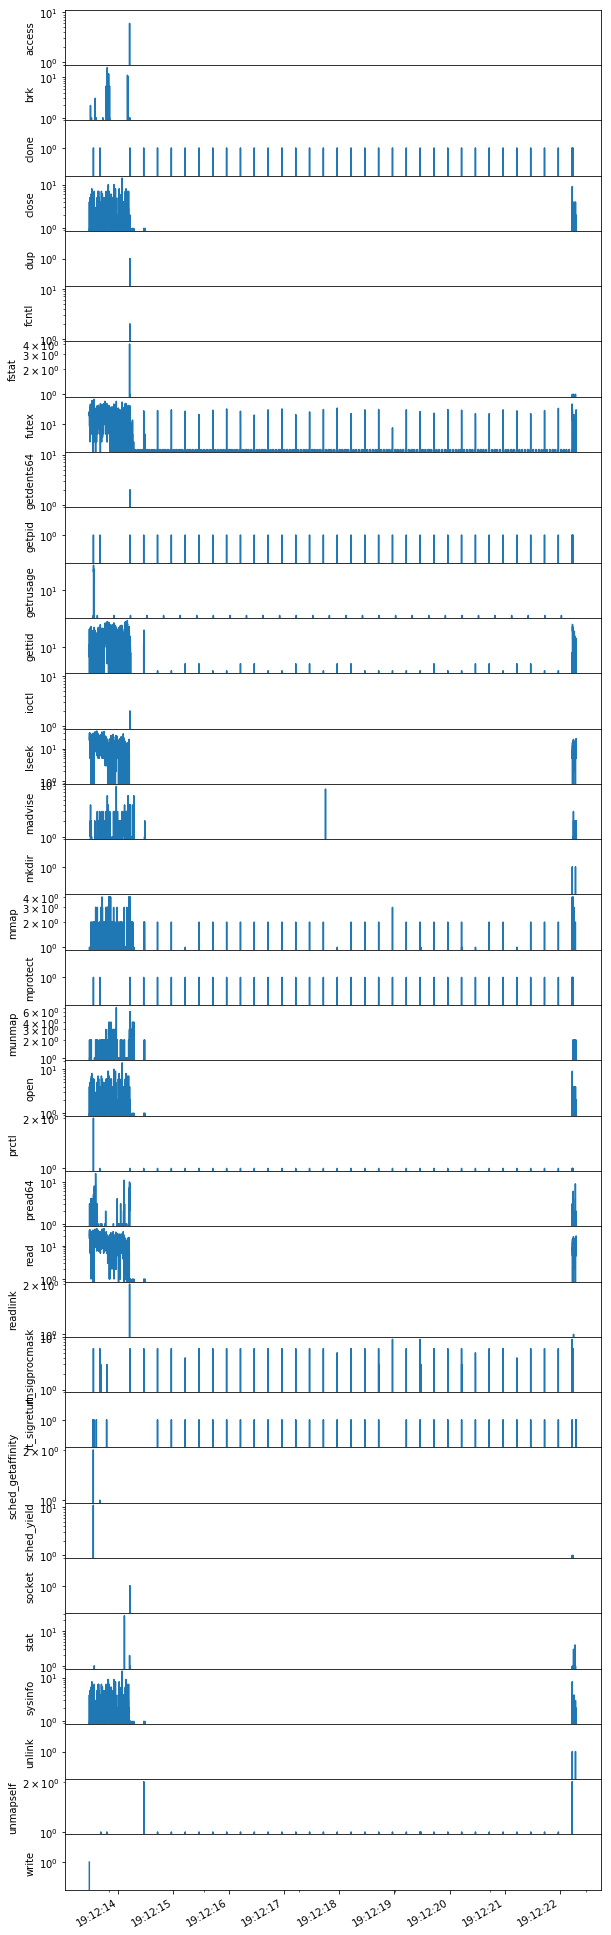

In [518]:
hypercall_strip_chart(df)

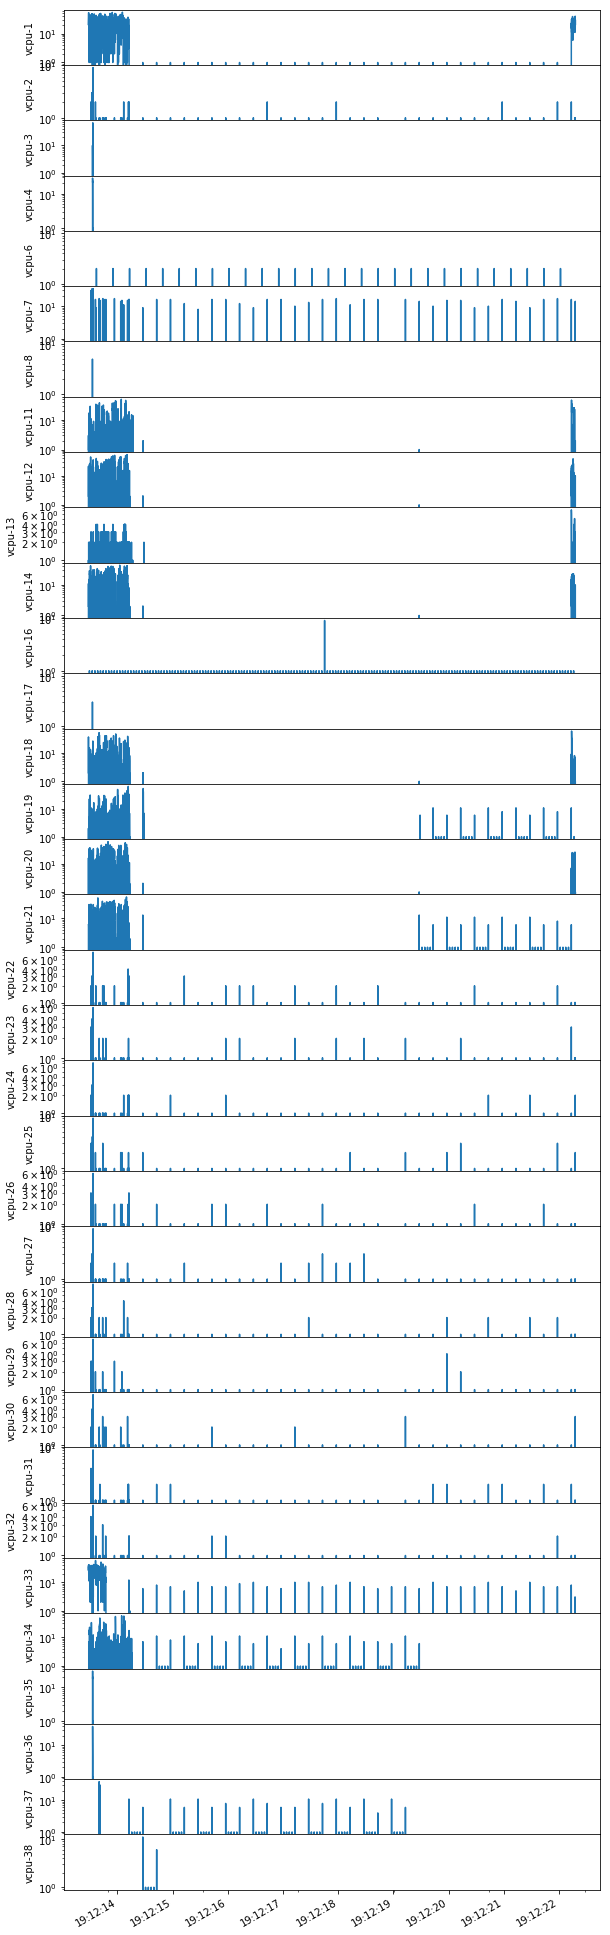

In [519]:
cpu_strip_chart(df)

# Base Line
The following charts are from a trace on John's systems that didn't see the delay we saw on Serge's system.

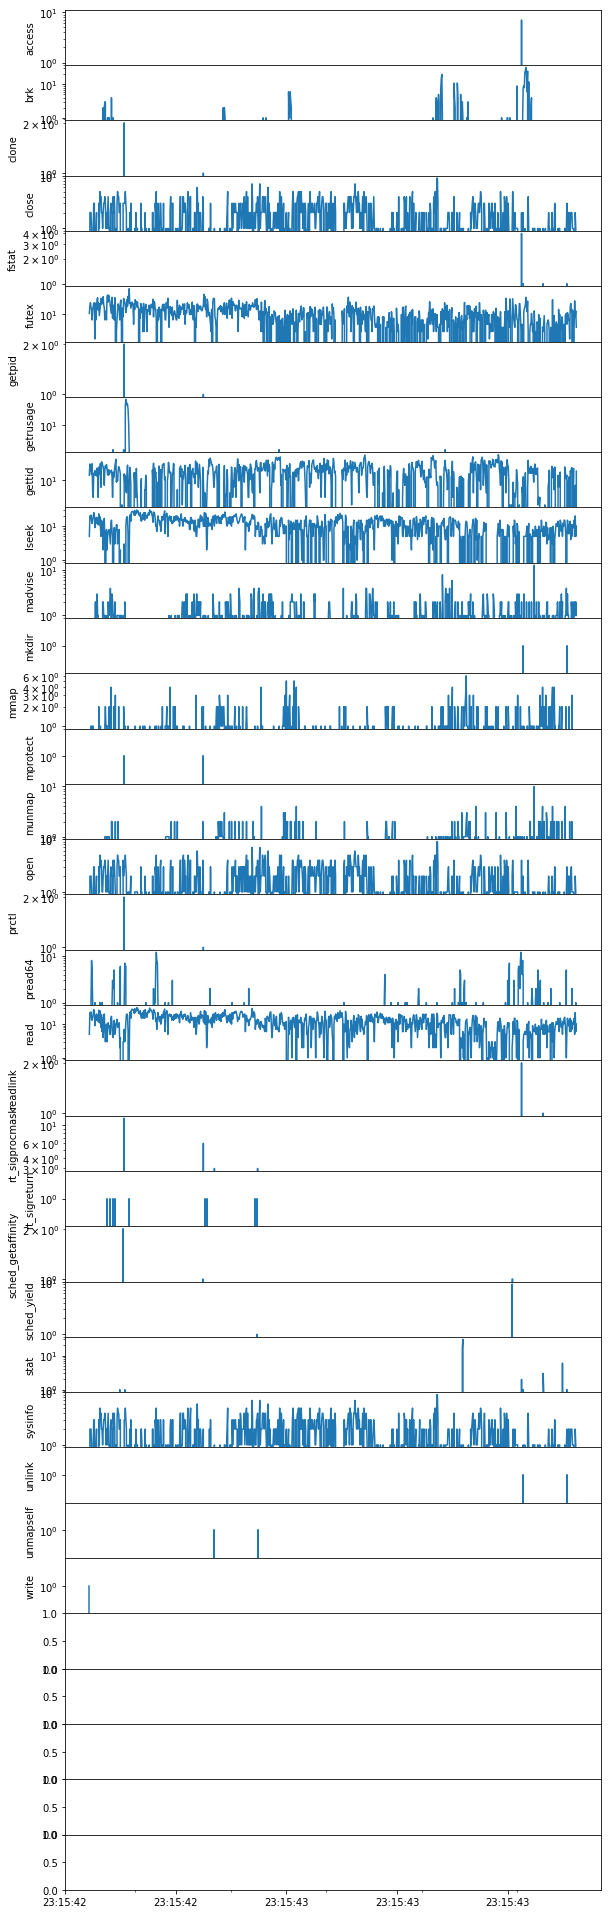

In [520]:
hypercall_strip_chart(read_kmtrace('wait_output.muth'))

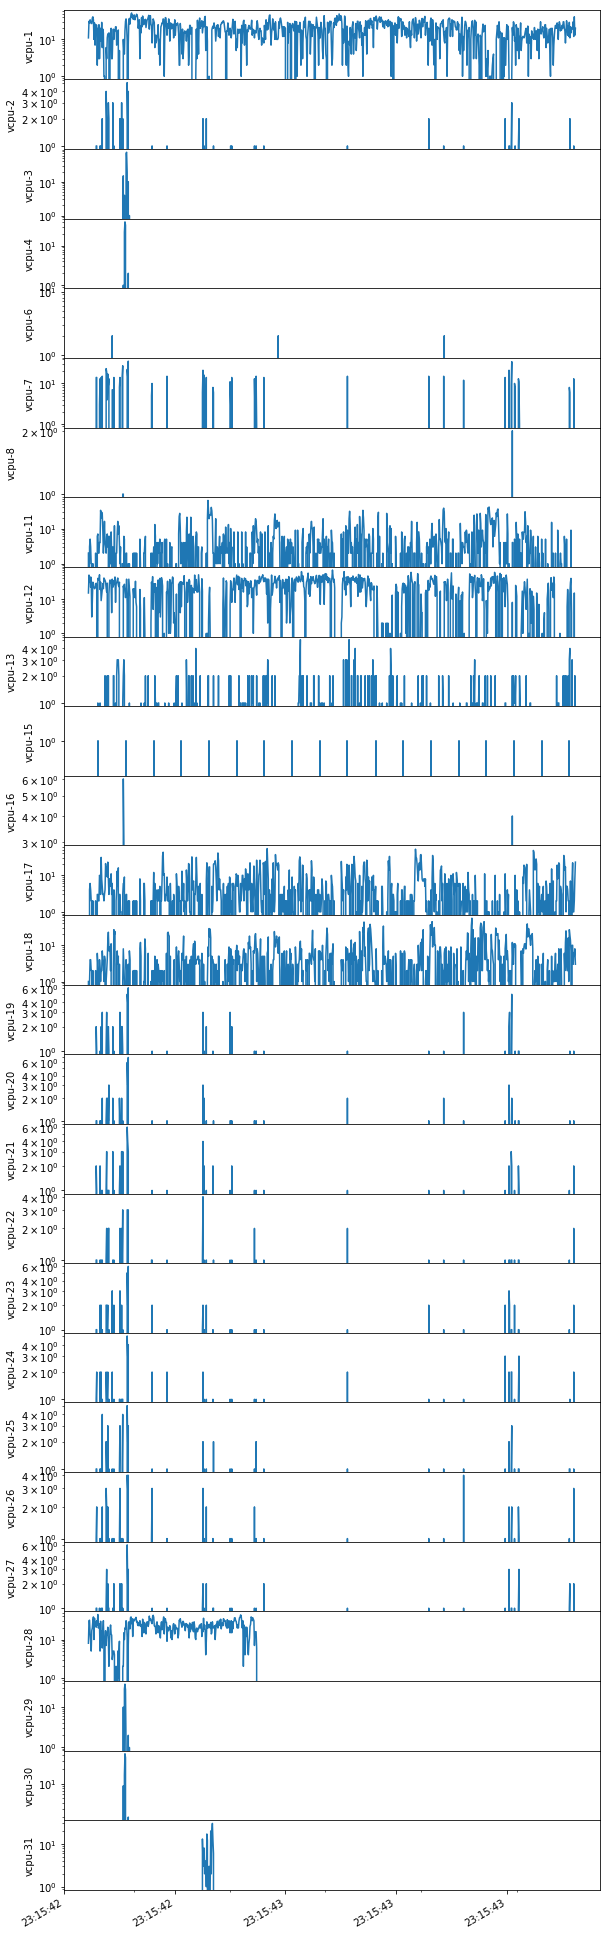

In [521]:
cpu_strip_chart(read_kmtrace('wait_output.muth'))

In [542]:

stop_time = pd.to_datetime(1594173409320648459)
new_df = read_kmtrace("new_output.muth")

In [543]:
new_df

,CPU,hypercall
2020-07-07 01:56:45.921438,vcpu-0,arch_prctl
2020-07-07 01:56:45.921589,vcpu-0,set_tid_address
2020-07-07 01:56:45.921645,vcpu-0,open
2020-07-07 01:56:45.921667,vcpu-0,open
2020-07-07 01:56:45.921678,vcpu-0,fcntl
2020-07-07 01:56:45.921692,vcpu-0,fstat
2020-07-07 01:56:45.921705,vcpu-0,read
2020-07-07 01:56:45.921739,vcpu-0,mmap
2020-07-07 01:56:45.921764,vcpu-0,mmap
2020-07-07 01:56:45.921786,vcpu-0,mmap


/usr/lib64/python3.7/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)
/usr/lib64/python3.7/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)
/usr/lib64/python3.7/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)
/usr/lib64/python3.7/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)
/usr/lib64/python3.7/site-packag

IndexError: index 34 is out of bounds for axis 0 with size 34

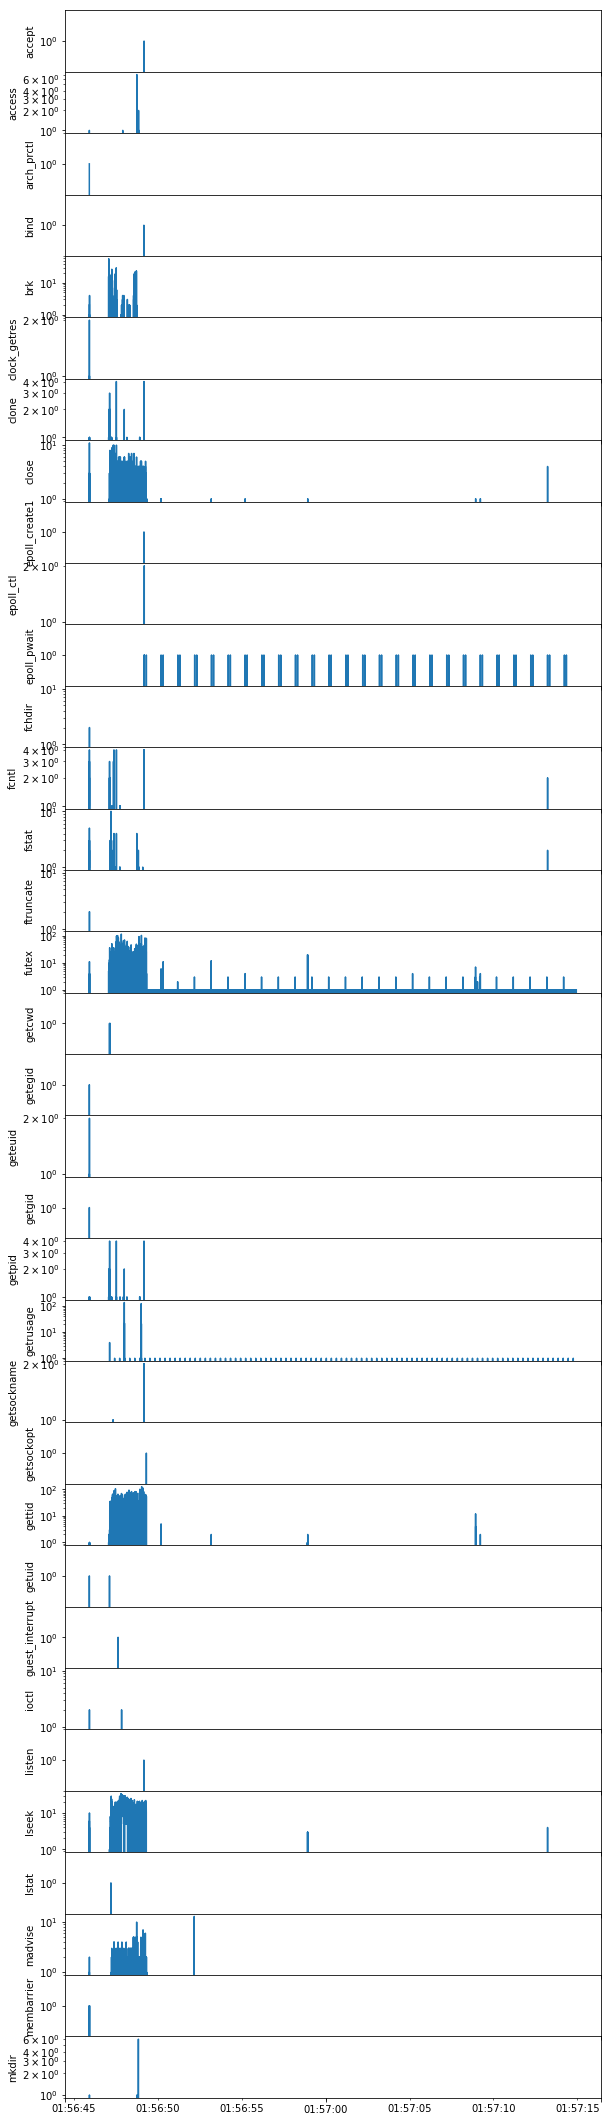

In [544]:
hypercall_strip_chart(new_df)

# Serge Run- 2
I

In [546]:
start_time = pd.to_datetime(1594226547641095795)
ready_time = pd.to_datetime(1594226557734983043)

(start_time, answer_time)

(Timestamp('2020-07-08 16:42:27.641095795'),
 Timestamp('2020-07-08 16:42:37.734983043'))

In [547]:
answer_time - start_time

Timedelta('0 days 00:00:10.093887')

In [552]:
serge2 = read_kmtrace('trace.serge2')

/usr/lib64/python3.7/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)
/usr/lib64/python3.7/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)
/usr/lib64/python3.7/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)
/usr/lib64/python3.7/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)
/usr/lib64/python3.7/site-packag

IndexError: index 34 is out of bounds for axis 0 with size 34

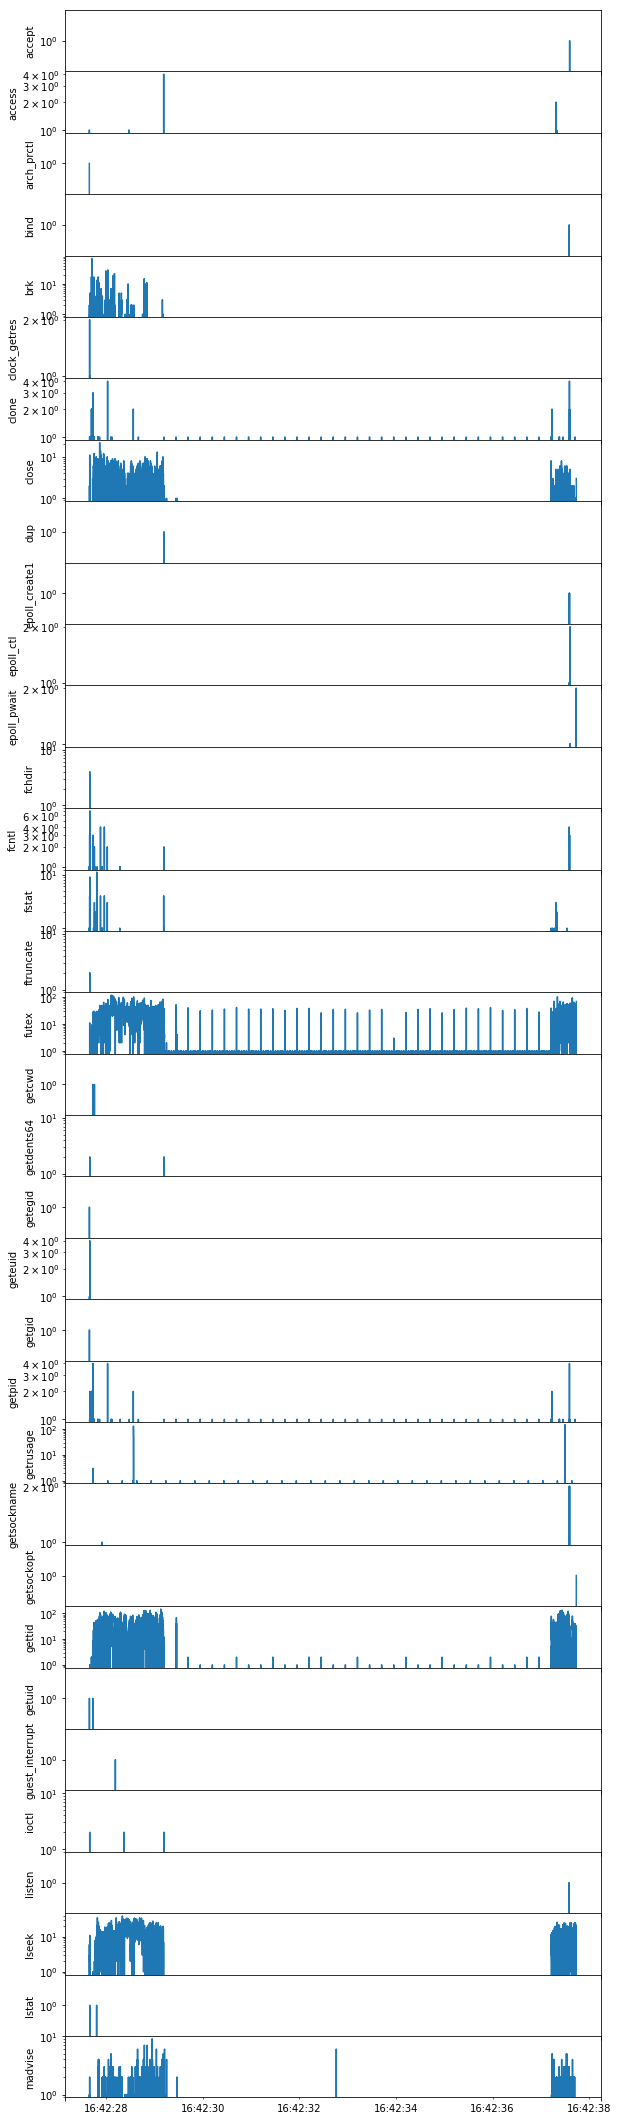

In [555]:
# Select items between start and ready
z = serge2[serge2.index <= ready_time]
hypercall_strip_chart(z)

In [556]:
pd.to_datetime(1594243353676414818)

Timestamp('2020-07-08 21:22:33.676414818')

In [557]:
1594671338.380517926 - 1594671337.256868008

1.1236498355865479